In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def openDataSet(file_name=None):

    if file_name == None:
        print("Give proper file name")
        return
    
    rating_data = pd.read_csv(file_name)
    rating_data.drop("TimeStamp", axis=1, inplace=True)

    return rating_data

# funtion that load the data set into our program
def loadData(data_set = None):

    if (data_set == None):
        return None
    else:
        data = []
        fptr = open(data_set, "r")
        lines = fptr.readlines()
        for line in lines:
            line = line.strip().split()
            for i in range(len(line)):
                line[i] = float(line[i])
            # print(line)
            data.append(line)
        
        return np.array(data)

In [16]:
rating_data_driver_1 = openDataSet("5_11/Rating.csv")
data_set_1 = loadData("5_11/visual_annotion_5_11.txt")

In [4]:
acc_mag_1 = np.sqrt(data_set_1[0]**2 + data_set_1[1]**2 + data_set_1[2]**2)

In [6]:
df_1 = pd.DataFrame(data_set_1, columns=['acc_x', 'acc_y', 'acc_z', 'wrist_movement'])

In [38]:
window_size = 10 * 32  # 10 seconds * 32 frames/second
num_windows = len(data_set_1) // window_size
acc_magnitudes = []

for i in range(num_windows):
    start_index = i * window_size
    end_index = (i + 1) * window_size
    acc_window = data_set_1[start_index:end_index]
    acc_magnitude = np.sqrt(acc_window[0]**2 + acc_window[1]**2 + acc_window[2]**2).mean()
    acc_magnitudes.append(acc_magnitude)

    # if len(acc_magnitudes) >= 90: 
    #     break

pearson_correlation, _ = pearsonr(acc_magnitudes, rating_data_driver_1['Rating'][:len(acc_magnitudes)])

In [39]:
print("Pearson Correlation between ACC magnitude and driver ratings:", pearson_correlation)

# len(df_1)

Pearson Correlation between ACC magnitude and driver ratings: 0.00317679493651998


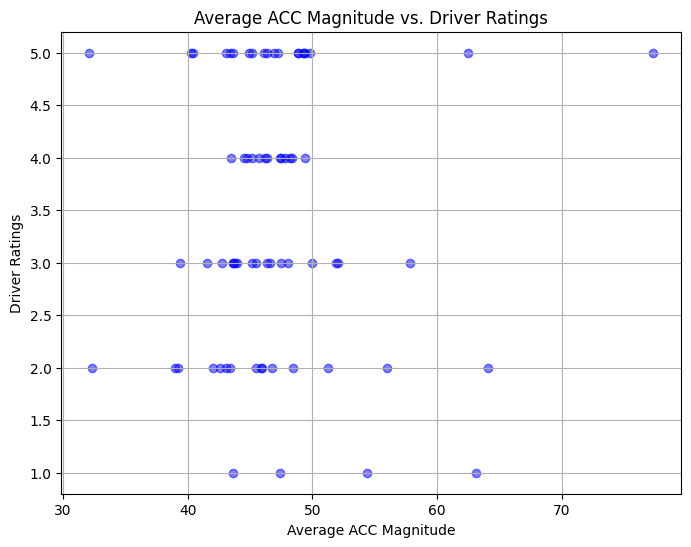

In [41]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(acc_magnitudes, rating_data_driver_1['Rating'][:len(acc_magnitudes)], color='blue', alpha=0.5)
plt.title('Average ACC Magnitude vs. Driver Ratings')
plt.xlabel('Average ACC Magnitude')
plt.ylabel('Driver Ratings')
plt.grid(True)
plt.show()